## Airport taxi project



## Espaniol

En este proyecto se analizaran unas bases de datos creadas en mysql sobre taxis en la ciudad de Chicago. 
En la base creada hay 3 archivos que contienen la siguiente informacion: 
1.Company and Trips: esta base contiene las companias de taxis y los viajes realizados entre el 15 y 16 de noviembre de 2017.  
2.Location and avg trips: esta contiene los barrios donde finalizaron los viajes y el promedio de viajes de cada locacion para noviembre de 2017
3. Ariport trips: los viajes desde el loop hasta el aereopuerto internacional ohare, esta tabla contiene fecha y hora de recogida, las condiciones climatologicas, y la duracion del viaje. 

Vamos a checar los datos, limpiarlos de ser necesario  en las 3 tablas. Posteriorment haremos los siguientes pasos en cada una. 
1. Para la base de company and trips es un analisis general de empresas, viajes para mostrar los datos
2. para location and avg trips vamos a checar los 10 principales barrios y graficarlos 
3. para la de viajes en el aereopuerto vamos a probar la hipotesis de que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". 

## English 

In this project we analyze the data bases created in mysql about taxi trips in the city of chicago. We have the three following files created using mysql. 
1.Company and trips: has the company names and the number of trips made between November 15 and 16 of 2017.
2. location and avgtrips: has the droppoff locations and the trips made in november 2017
3. airport trips: has the trips between the Loop and the international airport Ohare. it contains the date, weather, and trip duration. 

We are going to check the data, clean it if necessary in the 3 tables. Afterwards we are going to do the following: 
1. For company and trips we are going to graph the data.
2. For location and avtg trips we are going to show th 10 most travelled locations and graph it.
3. For the airport table we are going to test the hypothesis " Average duration of trips from the Loop to the International Airport changes on rainy saturdays" 



## Data preparation
## Preparacion de los datos. 

The first step is to check the data and correct any possible mistakes, duplicates, missing values. We are going to work 



In [1]:
#import relevant libraries 
from scipy import stats as st
import pandas as pd 
from matplotlib import pyplot as plt 


In [2]:
#import the datasets 

Companies = pd.read_csv('Company_and_Trips.csv')
Location = pd.read_csv('Location_and_avgTrips.csv')
Airport = pd.read_csv('AirportTrips.csv')



In [3]:
#empezamos en companies
#lets begin with companies 

Companies.info(show_counts=True)
#check for duplicates 
duplicatesCompany = Companies.duplicated().sum()
display('duplicated number is', duplicatesCompany)
display (Companies.head(10)) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


'duplicated number is'

0

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


#Eng We see the data are in object for the name and in int for the trips. the column names are in lowercase and with a dash. 
There are no duplicates
#esp Los datos estan en obcj para el nombre e int para los viajes, las columnas en minusculas con guion bajo y no tenemos duplicados, se puede proceder con el analisis. 

In [4]:
Location.info(show_counts=True)
duplicatesLoc = Location.duplicated().sum()
display('duplicated number is', duplicatesLoc)
display (Location.head(10)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


'duplicated number is'

0

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#Eng We see the data are in object for the name and in float for the trips. the column names are in lowercase and with a dash. 
There are no duplicates. We just need to reduce the number of decimals of the float to just 2 decimal points for easyness. 
#esp Los datos estan en obcj para el nombre e int para los viajes, las columnas en minusculas con guion bajo y no tenemos duplicados. Solo tenemos que reducir el numero de decimales a 2 puntos para facilidad. 

In [5]:
Location['average_trips'] = Location['average_trips'].round(decimals=2)


In [6]:
Airport.info(show_counts=True)
duplicatesAIR = Airport.duplicated().sum()
display('duplicated number is', duplicatesAIR)
display (Airport.head(10)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


'duplicated number is'

197

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


#ENg 
we have some duplicates and the Start_ts is in .object. First we need to check for true duplicates since, because of the nature of the data, it could be showing a false positives. Since we had already isolated the information from only saturdays in MYSQL we do not need to change the Start TS to Datetime format since it is already isolated to what we want 

#ESP
Tenemos algunos duplicados y la fecha esta en .object.Primero vamos a checar por duplicados verdaderos, es decir filas que sean exactamente iguales en todos sus puntos para evitar falsos positivos. Como ya habiamos aislado las fechas que nos interesan en MYSQL no vamos a convertir la fecha en formato fecha ya que no vamos a trabajar con esa columna. 


In [7]:
#we check for true duplicates

Realduplicates = Airport[Airport.duplicated(keep=False) & Airport.apply(lambda row: row.duplicated().all(), axis=1)]
display ((Realduplicates))
#change to datetime format. 
Airport['start_ts'] = pd.to_datetime(Airport['start_ts'])



,start_ts,weather_conditions,duration_seconds



Eng: We have no true duplicates 
ESP: No tenemos duplicados reales


## Company data showcase 
ENG: We are going to show the companies with their average number of trips. 
ESP: vamos a ver los viajes promedio de las companias y que datos podemos deducir de ahi 

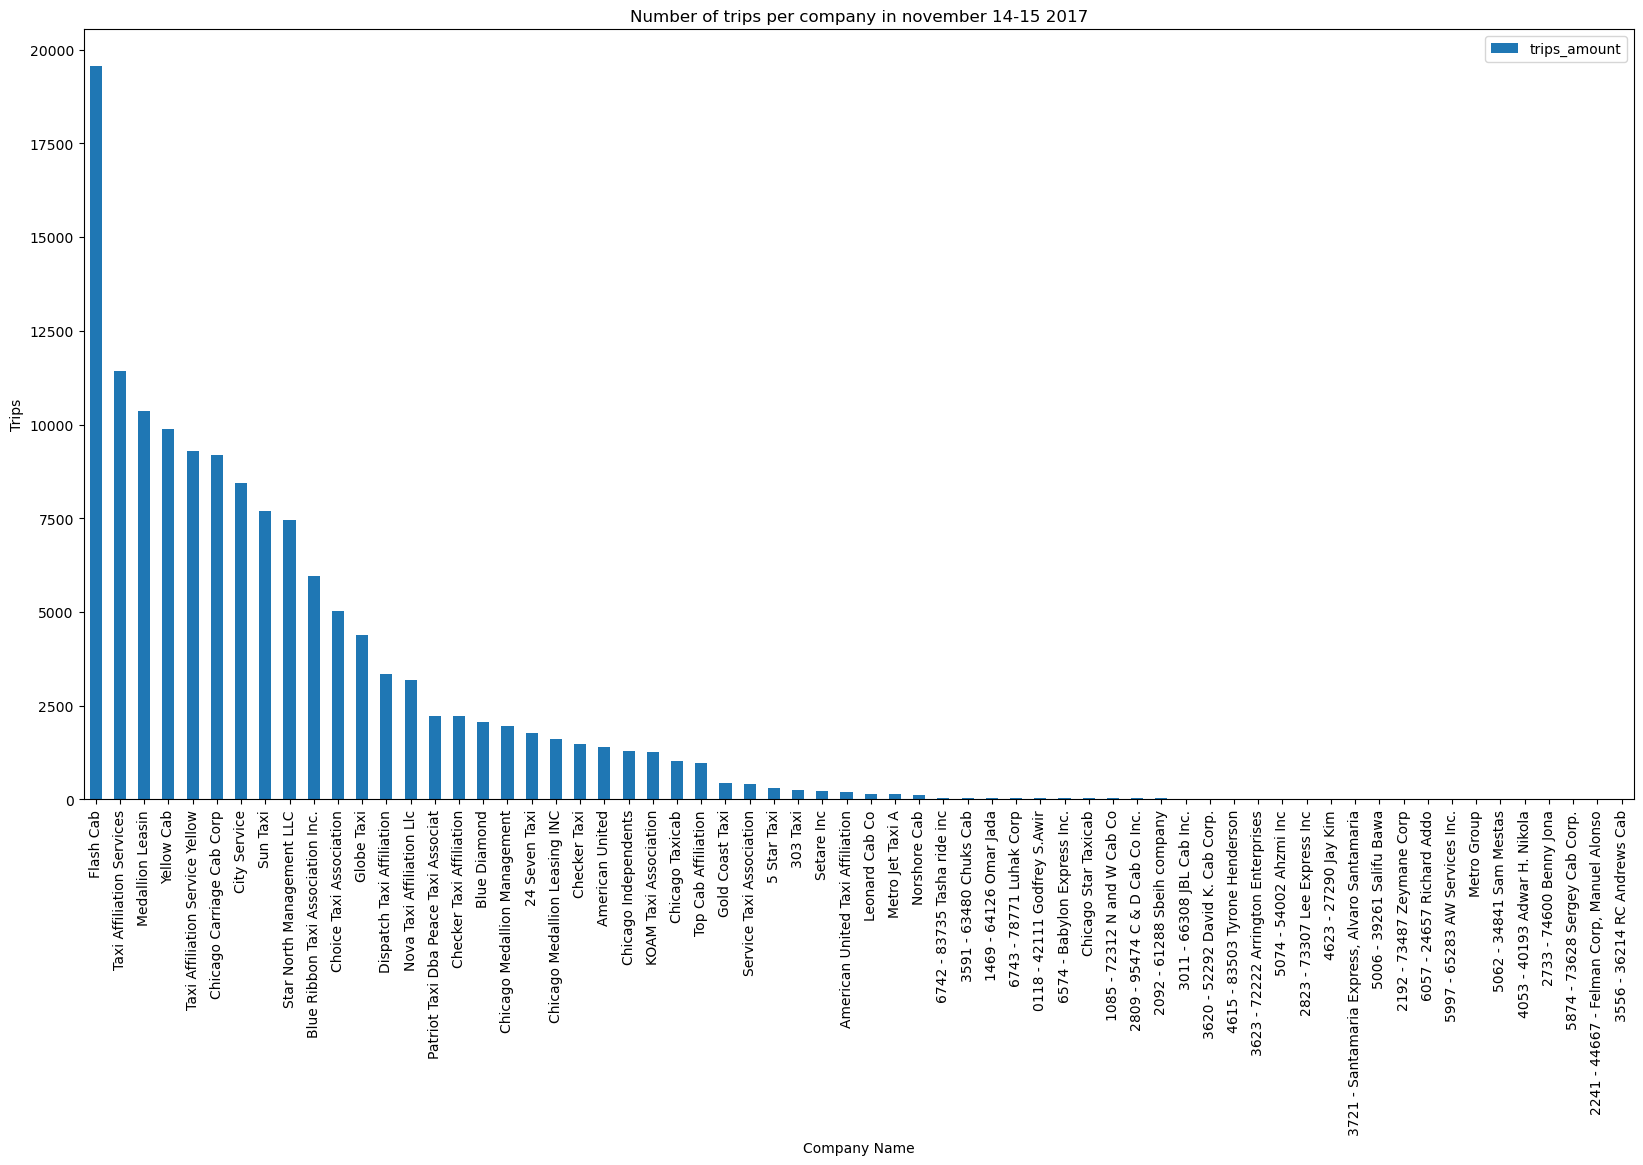

In [8]:


Companies.plot(kind = 'bar',
               x='company_name', 
               y='trips_amount',
               title = 'Number of trips per company in november 14-15 2017',
               xlabel = 'Company Name',
               ylabel= 'Trips',
               figsize= (20,10)
                             )
plt.show()

Eng: The first graph shows that a lot fo companies have a very low number of trips, we are going to group those into an "other" category" for easyness. 
ESP: Vemos que hay varias companies con un numero muy bajo en comparacion de viajes, asi que vamos a agrupar esos viajes en una categoria de"otros" 

In [9]:
TempCompanies = Companies

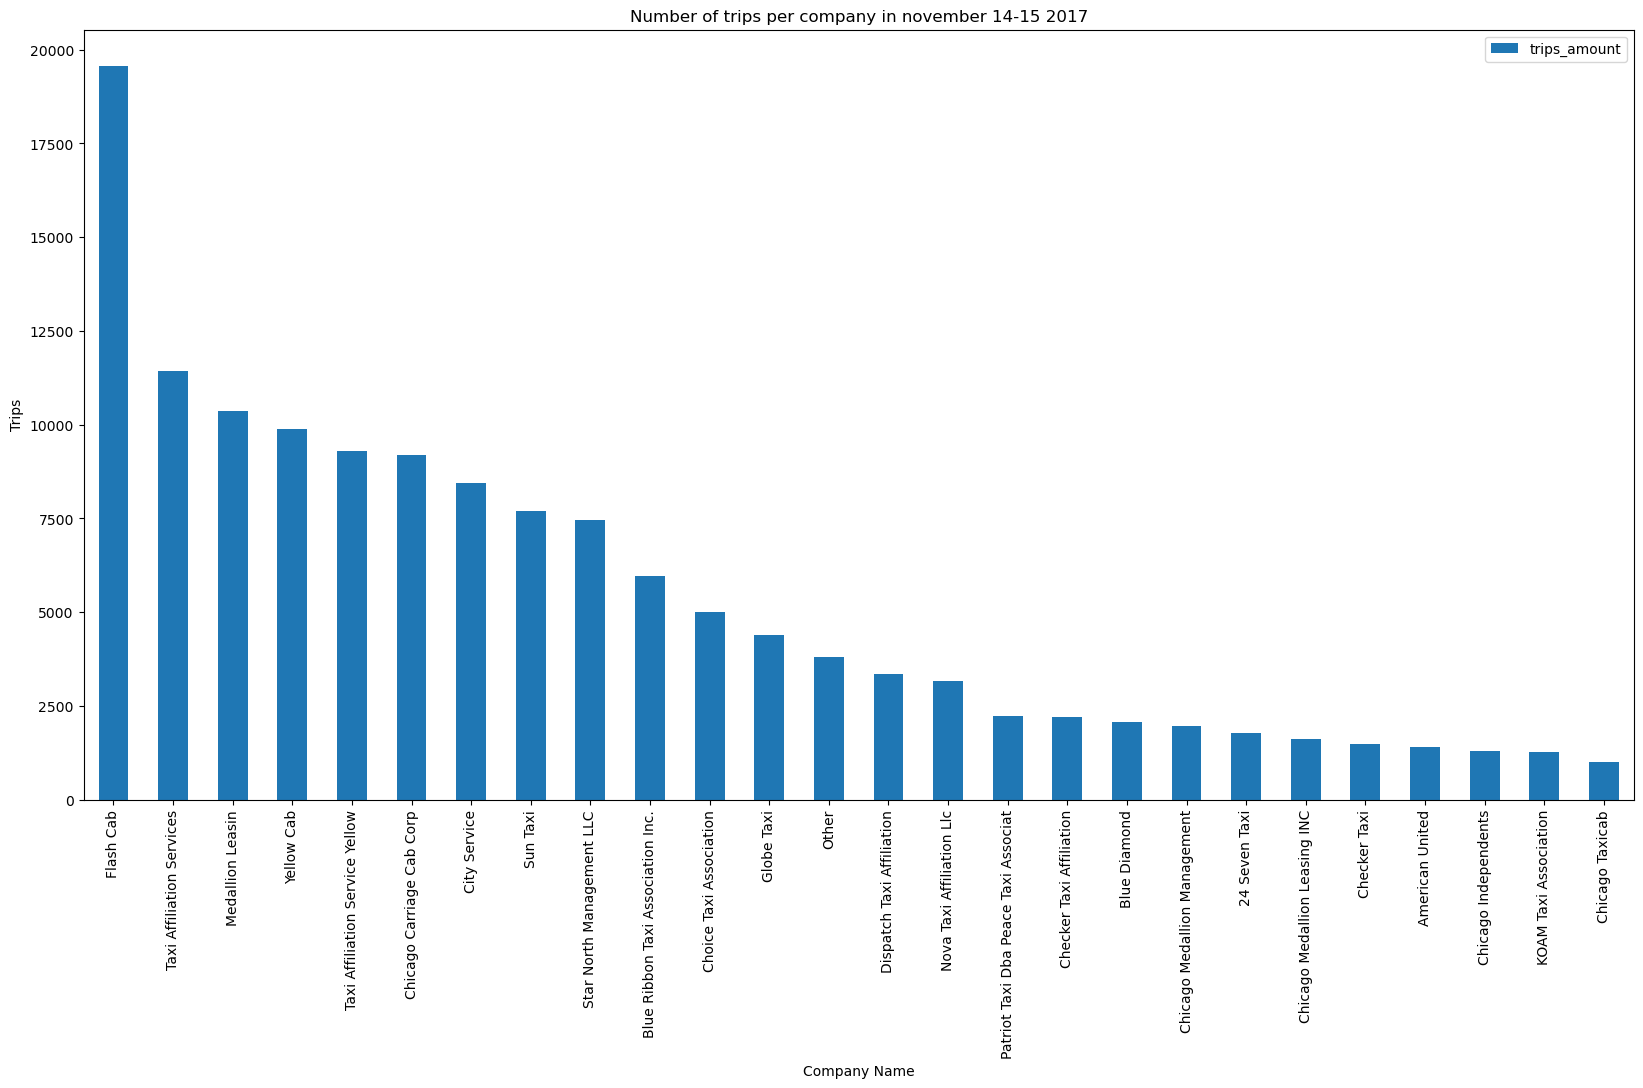

In [10]:

TempCompanies['company_name'] = TempCompanies.apply(lambda row: 'Other' if row['trips_amount'] < 1000 else row['company_name'], axis=1)


CompaniesReduced = TempCompanies.groupby('company_name', as_index=False)['trips_amount'].sum().sort_values(by=['trips_amount'],ascending=False)

CompaniesReduced.plot(kind = 'bar',
               x='company_name', 
               y='trips_amount',
               title = 'Number of trips per company in november 14-15 2017',
               xlabel = 'Company Name',
               ylabel= 'Trips',
               figsize= (20,10)
                             )
plt.show()


In [11]:
TotalMarketTaxi = CompaniesReduced['trips_amount'].sum()
CompaniesReduced['Market_Share']= (CompaniesReduced['trips_amount']/TotalMarketTaxi)*100
display(CompaniesReduced['Market_Share'].head(10).sum())
display (CompaniesReduced)

72.29719396115388

,company_name,trips_amount,Market_Share
14,Flash Cab,19558,14.243578
24,Taxi Affiliation Services,11422,8.318343
17,Medallion Leasin,10367,7.550014
25,Yellow Cab,9888,7.201171
23,Taxi Affiliation Service Yellow,9299,6.772218
6,Chicago Carriage Cab Corp,9181,6.686282
12,City Service,8448,6.152457
22,Sun Taxi,7701,5.608436
21,Star North Management LLC,7455,5.429281
3,Blue Ribbon Taxi Association Inc.,5953,4.335414


## Conclusions 
#ENG 
We can see that the top 10 companies have over 5000 trips each with a market share between them of 72.3 %. The other taxi companies have less than 500 trips sharing the other 27.7 % of the market. 
# Esp 
Podemos ver que las 10 companias principales tienen mas de 5000 viajes con un share del mercado entre ellas del 72.3% las otras companias de taxi tienen 27.7%. 


## Location data showcase 
ENG: We are going to show the locations and their top 10 dropp off locations. 
ESP: vamos a ver los lugares de termino del viaje y los 10 lugares donde se dejan mas pasajeros. 

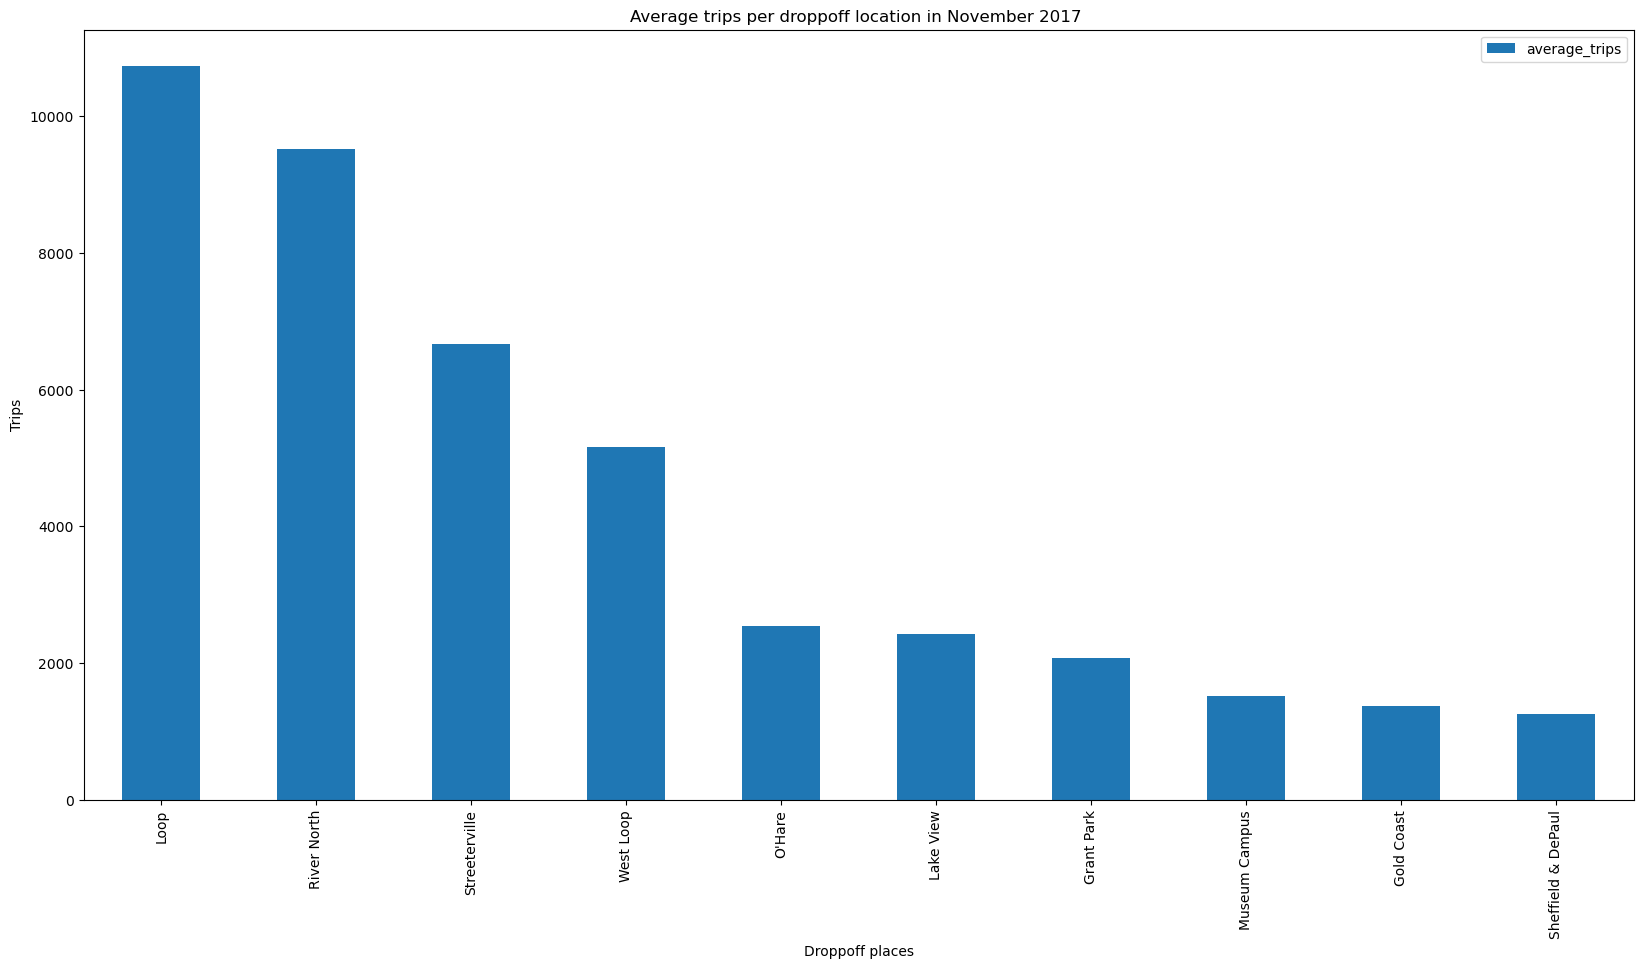

In [12]:
#since We are only looking for the top 10 we can slice it from the beggining. 
LocationCut= Location.head(10)

LocationCut.plot(kind = 'bar',
               x='dropoff_location_name', 
               y='average_trips',
               title = 'Average trips per droppoff location in November 2017 ',
               xlabel = 'Droppoff places',
               ylabel= 'Trips',
               figsize= (20,10)
                             )
plt.show()

## Conclusions 
#ENG 
We can see that most of the trips end at the loop followed up by River North. 

# Esp 
Podemos ver que la mayor parte de los viajes terminan en el Loop seguido del River North. 

## Hypothesis testing 

#ENG 
We are going to test the following hypothesis 
1. " Average duration of trips from the Loop to the International Airport changes on rainy saturdays" 


#ESP 
Vamos a probar la siguientes hipotesis. 
1. "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". 




#ENG  

For the hypothesis " Average duration of trips from the Loop to the International Airport changes on rainy saturdays" We have the following Null and alternative hypothesis 


Null: The average duration of the trips from the Loop to the INternational Airport does not change on rainy saturdays" 
Alternative hypothesis: Average duration of trips from the Loop to the International Airport changes on Rainy Saturdays" 

Since we are looking to check the average duration on an specific situation against similar events, and we are looking at change either increase or decrease its a Two-Tailed test. Since we can asumme average trips behave in a Normal way we take an alpha of 0.05. 

We are going to do the following steps:
1. Isolate the information on saturdays and divide it by 2 between good and bad weather.
2. Do the two-tailed test. 




#ESP 

Para la  hipotesis ""La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"."  esta las hipotesis nula y alternativa es la siguiente:

Hipotesis nula: Las duracion promedio de los viajes desde el Loop hasta el Aereopuerto Internacional son las mismas en los sabados lluviosos. 

Hipotesis alternativa: La duracion promedio de los viajes desde el Loop hasta el aereopuerto Internacional cambia los sabados lluviosos. 

Aqui buscamos comparar la media de una duracion en una situacion especifica contra otros eventos similares. Dado que queremos ver si cambia, ya sea positiva o negativamente es una prueba de dos colas.
Tomamos un umbral de alfa de 0.05 porque podemos asumir que la duracion de los viajes del loop al aerepouerto se comportan de forma normal. 

vamos a tomar los siguientes pasos:

Aislamos la informacion de sabados y dividirla en 2, los que tienen good y los que tienen bad weather
Se hace una prueba de dos colas

In [13]:
display(Airport)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [14]:
# we separate by good weather and bad weather 

GoodWeather = Airport[Airport['weather_conditions']=='Good']
BadWeather = Airport[Airport['weather_conditions']=='Bad']
display(GoodWeather['duration_seconds'].mean())
display(BadWeather['duration_seconds'].mean())

t_statistic, p_value = st.ttest_ind(GoodWeather['duration_seconds'], BadWeather['duration_seconds'])

# Mostrar resultados
#mostrar resultados 
display(f"T-statistic: {t_statistic}")
display(f"P-value: {p_value}")

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    display("Reject the null hypothesis: Average travel time on rainy days are Different .")
else:
    display("Fail to reject the null hypothesis: Average travel time on rainy days are the same .")


1999.6756756756756

2427.2055555555557

'T-statistic: -6.946177714041499'

'P-value: 6.517970327099473e-12'

'Reject the null hypothesis: Average travel time on rainy days are Different .'

## Conclusions 
ENG 
The average travel time on good days on saturdays is around 2000 seconds, while the average duration time on rainy days is 2427 seconds. After doing a Two-tailed test, we rejected the Null Hypothesis that their difference is not statistically significant. 

ESP 

EL promedio de duracion de los viajes en sabados sin lluvia es de alrededor de 2000 segundos, mientras que en sabados con lluvia es de 2427. Despues de hacer una prueba de dos colas, rechazamos la hipotesis nula ya que su diferencia es estadisticamente significativa. 




